In [7]:
#Load the Data
import pandas as pd

# Load the dataset
data = pd.read_csv('terrorism_updt.csv')

# Display the first few rows of the dataset
data.head()

,Country,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0


In [8]:

# Display basic information about the dataset
data.info()

# Summary statistics of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9263 entries, 0 to 9262
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            9263 non-null   object
 1   Code               9263 non-null   object
 2   Year               9263 non-null   int64 
 3   Terrorist attacks  9263 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 289.6+ KB


,Year,Terrorist attacks
count,9263.000000,9263.000000
mean,1996.283386,44.578538
std,15.084256,430.850979
min,1970.000000,0.000000
25%,1983.000000,0.000000
50%,1997.000000,0.000000
75%,2009.000000,4.000000
max,2021.000000,16820.000000


In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Country              0
Code                 0
Year                 0
Terrorist attacks    0
dtype: int64


In [10]:
# Check for duplicate rows
duplicates=data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows
data = data.drop_duplicates()

Number of duplicate rows: 0


In [11]:
# Create a separate dataset excluding rows with zero terrorist attacks for predictive modeling
predictive_data = data[data['Terrorist attacks'] > 0]

# Retain zero values for trend analysis
trend_data = data.copy()


In [12]:
# Convert 'Year' to integer
data['Year'] = data['Year'].astype(int)

# Convert 'Terrorist attacks' to integer
data['Terrorist attacks'] = data['Terrorist attacks'].astype(int)

In [13]:
# Strip leading/trailing spaces in 'Country' and 'Code'
data['Country'] = data['Country'].str.strip()
data['Code'] = data['Code'].str.strip()

# Ensure consistent case (e.g., all uppercase or all lowercase)
data['Country'] = data['Country'].str.upper()
data['Code'] = data['Code'].str.upper()


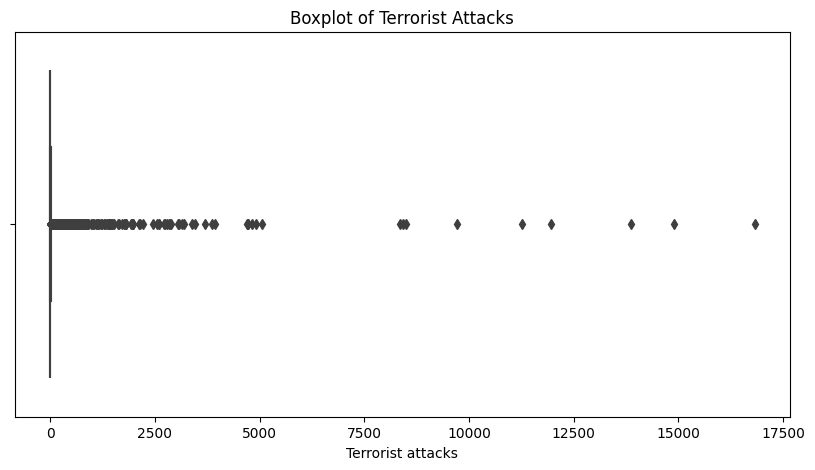

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Terrorist attacks'])
plt.title('Boxplot of Terrorist Attacks')
plt.show()

# For instance, you might decide to cap extreme values at a certain threshold
threshold = data['Terrorist attacks'].quantile(0.99)
data['Terrorist attacks'] = data['Terrorist attacks'].apply(lambda x: min(x, threshold))


In [15]:
# Save the cleaned datasets
data.to_csv('cleaned_terrorism_data.csv', index=False)
predictive_data.to_csv('predictive_terrorism_data.csv', index=False)
trend_data.to_csv('trend_terrorism_data.csv', index=False)


In [16]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()

,Country,Code,Year,Terrorist attacks
0,AFGHANISTAN,AFG,1970,0.0
1,AFGHANISTAN,AFG,1971,0.0
2,AFGHANISTAN,AFG,1972,0.0
3,AFGHANISTAN,AFG,1973,1.0
4,AFGHANISTAN,AFG,1974,0.0


In [17]:
# Total terrorist attacks by country
total_attacks = df.groupby('Country')['Terrorist attacks'].sum()
print(total_attacks)


Country
AFGHANISTAN            10045.0
ALBANIA                   83.0
ALGERIA                 2754.0
ANDORRA                    1.0
ANGOLA                   501.0
                        ...   
YEMEN                   5775.8
YEMEN ARAB REPUBLIC        6.0
YUGOSLAVIA               203.0
ZAMBIA                    63.0
ZIMBABWE                 106.0
Name: Terrorist attacks, Length: 196, dtype: float64


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Check the unique countries in the dataset
unique_countries = data['Country'].unique()
print(f"Number of unique countries: {len(unique_countries)}")
print(f"Unique countries: {unique_countries}")

Number of unique countries: 196
Unique countries: ['AFGHANISTAN' 'ALBANIA' 'ALGERIA' 'ANDORRA' 'ANGOLA'
 'ANTIGUA AND BARBUDA' 'ARGENTINA' 'ARMENIA' 'AUSTRALIA' 'AUSTRIA'
 'AZERBAIJAN' 'BAHAMAS' 'BAHRAIN' 'BANGLADESH' 'BARBADOS' 'BELARUS'
 'BELGIUM' 'BELIZE' 'BENIN' 'BHUTAN' 'BOLIVIA' 'BOSNIA AND HERZEGOVINA'
 'BOTSWANA' 'BRAZIL' 'BRUNEI' 'BULGARIA' 'BURKINA FASO' 'BURUNDI'
 'CAMBODIA' 'CAMEROON' 'CANADA' 'CENTRAL AFRICAN REPUBLIC' 'CHAD' 'CHILE'
 'CHINA' 'COLOMBIA' 'COMOROS' 'COSTA RICA' "COTE D'IVOIRE" 'CROATIA'
 'CUBA' 'CYPRUS' 'CZECHIA' 'CZECHOSLOVAKIA' 'DEMOCRATIC REPUBLIC OF CONGO'
 'DENMARK' 'DJIBOUTI' 'DOMINICA' 'DOMINICAN REPUBLIC' 'EAST GERMANY'
 'EAST TIMOR' 'ECUADOR' 'EGYPT' 'EL SALVADOR' 'EQUATORIAL GUINEA'
 'ERITREA' 'ESTONIA' 'ESWATINI' 'ETHIOPIA' 'FALKLAND ISLANDS' 'FIJI'
 'FINLAND' 'FRANCE' 'FRENCH GUIANA' 'FRENCH POLYNESIA' 'GABON' 'GAMBIA'
 'GEORGIA' 'GERMANY' 'GHANA' 'GREECE' 'GRENADA' 'GUADELOUPE' 'GUATEMALA'
 'GUINEA' 'GUINEA-BISSAU' 'GUYANA' 'HAITI' 'HONDURAS' 'H

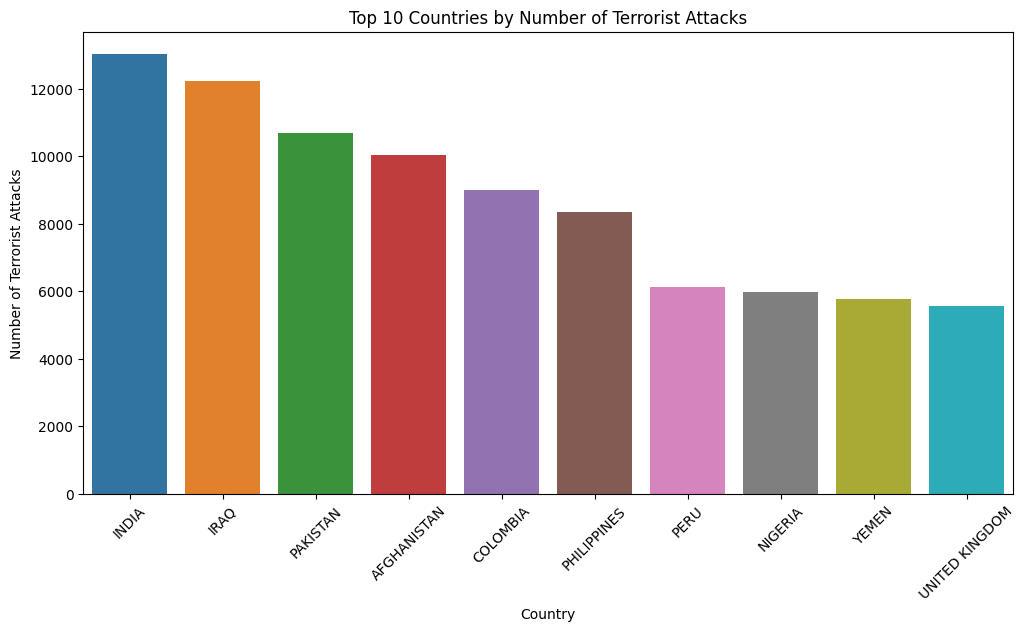

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of non-country entries to exclude
non_countries = ['WORLD', 'CZECHOSLOVAKIA', 'EAST GERMANY', 'YEMEN ARAB REPUBLIC', 'SERBIA AND MONTENEGRO', 'WEST GERMANY', 'YUGOSLAVIA']

# Filter out non-country entries
filtered_data = data[~data['Country'].isin(non_countries)]

# Group by country and sum the terrorist attacks
top_countries_filtered = filtered_data.groupby('Country')['Terrorist attacks'].sum().sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_filtered.index, y=top_countries_filtered.values)
plt.title('Top 10 Countries by Number of Terrorist Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Terrorist Attacks')
plt.xticks(rotation=45)
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect the data
print(data.head())
print(data.columns)

       Country Code  Year  Terrorist attacks
0  AFGHANISTAN  AFG  1970                0.0
1  AFGHANISTAN  AFG  1971                0.0
2  AFGHANISTAN  AFG  1972                0.0
3  AFGHANISTAN  AFG  1973                1.0
4  AFGHANISTAN  AFG  1974                0.0
Index(['Country', 'Code', 'Year', 'Terrorist attacks'], dtype='object')


In [22]:
# Inspect the first few rows of the data
print(data.head())

# Check unique countries before filtering
unique_countries_before = data['Country'].unique()
print(f"Unique countries before filtering: {unique_countries_before}")

       Country Code  Year  Terrorist attacks
0  AFGHANISTAN  AFG  1970                0.0
1  AFGHANISTAN  AFG  1971                0.0
2  AFGHANISTAN  AFG  1972                0.0
3  AFGHANISTAN  AFG  1973                1.0
4  AFGHANISTAN  AFG  1974                0.0
Unique countries before filtering: ['AFGHANISTAN' 'ALBANIA' 'ALGERIA' 'ANDORRA' 'ANGOLA'
 'ANTIGUA AND BARBUDA' 'ARGENTINA' 'ARMENIA' 'AUSTRALIA' 'AUSTRIA'
 'AZERBAIJAN' 'BAHAMAS' 'BAHRAIN' 'BANGLADESH' 'BARBADOS' 'BELARUS'
 'BELGIUM' 'BELIZE' 'BENIN' 'BHUTAN' 'BOLIVIA' 'BOSNIA AND HERZEGOVINA'
 'BOTSWANA' 'BRAZIL' 'BRUNEI' 'BULGARIA' 'BURKINA FASO' 'BURUNDI'
 'CAMBODIA' 'CAMEROON' 'CANADA' 'CENTRAL AFRICAN REPUBLIC' 'CHAD' 'CHILE'
 'CHINA' 'COLOMBIA' 'COMOROS' 'COSTA RICA' "COTE D'IVOIRE" 'CROATIA'
 'CUBA' 'CYPRUS' 'CZECHIA' 'CZECHOSLOVAKIA' 'DEMOCRATIC REPUBLIC OF CONGO'
 'DENMARK' 'DJIBOUTI' 'DOMINICA' 'DOMINICAN REPUBLIC' 'EAST GERMANY'
 'EAST TIMOR' 'ECUADOR' 'EGYPT' 'EL SALVADOR' 'EQUATORIAL GUINEA'
 'ERITREA' 'EST

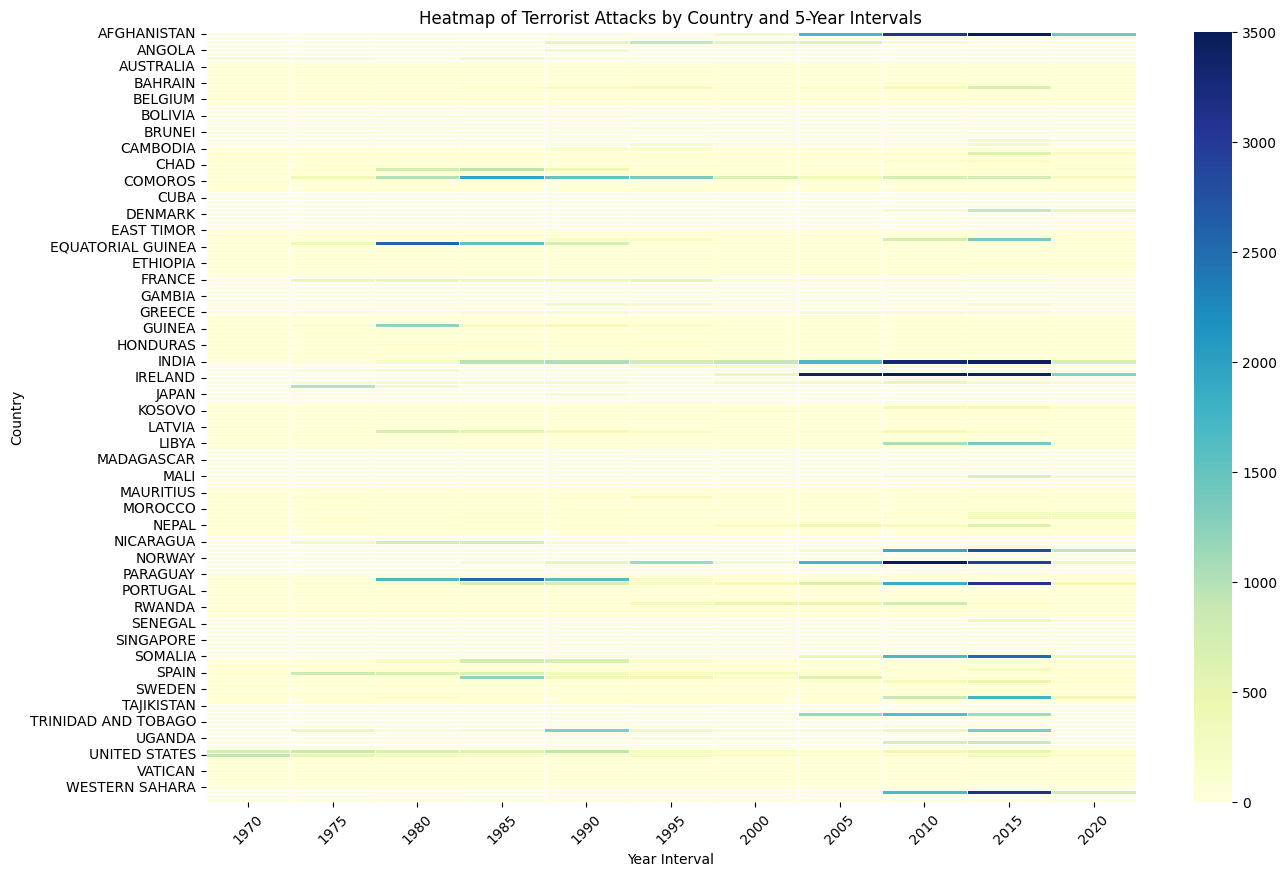

In [24]:
# Filter out non-country entries
non_countries = ['WORLD', 'USSR', 'CZECHOSLOVAKIA', 'EAST GERMANY', 'YEMEN ARAB REPUBLIC', 'SERBIA AND MONTENEGRO', 'WEST GERMANY', 'YUGOSLAVIA']
filtered_data = data[~data['Country'].isin(non_countries)]

# Remove any NaN or infinite values
filtered_data = filtered_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Year', 'Terrorist attacks'])

# Ensure the columns are properly formatted
filtered_data['Year'] = filtered_data['Year'].astype(int)
filtered_data['Terrorist attacks'] = filtered_data['Terrorist attacks'].astype(int)

# Create a new column for 5-year intervals
filtered_data['Year Interval'] = (filtered_data['Year'] // 5) * 5

# Pivot table for heatmap
heatmap_data = filtered_data.pivot_table(values='Terrorist attacks', index='Country', columns='Year Interval', aggfunc='sum', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Terrorist Attacks by Country and 5-Year Intervals')
plt.xlabel('Year Interval')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
